In [0]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

In [0]:
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [0]:
target = pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [0]:
min(target['target'])

5.0

In [0]:
df = pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [0]:
corr = df.corr('pearson')

In [0]:
corrs = [abs(corr[attr]['target'])for attr in list(features)]

In [0]:
l = list(zip(corrs,list(features)))

In [0]:
#sort a list of pairs in reverse order/descending order
#with the correlation value as the key for sorting
l.sort(key = lambda x: x[0],reverse= True)

#unzip pairs to two lists
#zip is an inbuild function in python that allows to combine multiple lists
corrs,labels = list(zip((*l)))


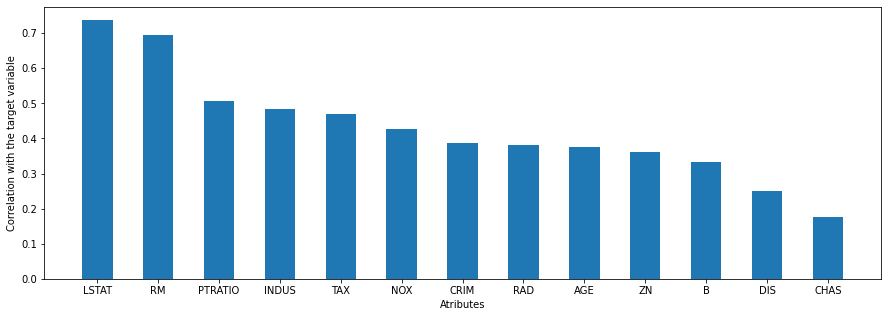

In [0]:

index = np.arange (len(labels))
plt.figure(figsize=(15,5))
plt.bar(index , corrs ,width=0.5)
plt.xlabel('Atributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index,labels)
plt.show()


In [0]:
X = df["LSTAT"].values
Y = df['target'].values

In [0]:
print(Y[:5])


[24.  21.6 34.7 33.4 36.2]


In [0]:

x_scaler  = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))

In [0]:
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))

In [0]:
print(Y[:5])

[[0.42222222]
 [0.36888889]
 [0.66      ]
 [0.63111111]
 [0.69333333]]


In [0]:
def error(m , x , c , t):
  N = x.size
  e = sum(((m * x + c) - t) ** 2)
  return e* 1/(2 * N)

In [0]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [0]:
def error(m,x,c,t):
  N = x.size
  e = sum(((m * x + c) - t) ** 2)
  return e* 1/(2 * N)

In [0]:
def update(m , x , c , t , learning_rate):
  grad_m = sum(2 * (( m * x + c )- t)*x)
  grad_c = sum(2 * (( m * x + c) - t))
  m = m - grad_m * learning_rate
  c = c - grad_c * learning_rate
  return m ,c

In [0]:

def gradient_descent(init_m,init_c,x,t,learing_rate,iterations,error_threshold):
  m = init_m
  c = init_c
  error_values = list()
  mc_values = list()
  for i in range(iterations):
    e = error(m,x,c,t)
    if e < error_threshold:
      print('Error less than the threshold , stopping gradint descent ')
      break
    error_values.append(e)
    m , c=update(m,x,c,t,learning_rate)
    mc_values.append((m,c))
  return m , c, error_values, mc_values

In [0]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [0]:
m ,c ,error_values,mc_values = gradient_descent(init_m, init_c, x_train, y_train, learning_rate, iterations,error_threshold)

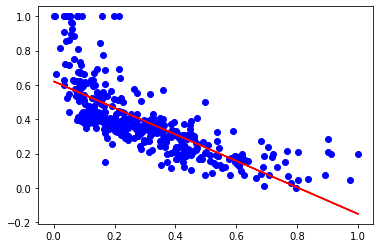

In [0]:

plt.scatter(x_train , y_train , color='b')
plt.plot(x_train , (m * x_train + c) , color= 'r')

Text(0.5, 0, 'Iterations')

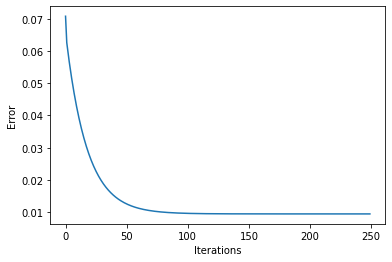

In [0]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

In [0]:
mc_values_anim = mc_values[0:250:5]

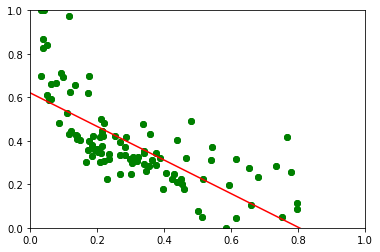

In [0]:
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro-', animated=True)

def init():
  plt.scatter(x_test, y_test, color='g')
  ax.set_xlim(0, 1.0)
  ax.set_ylim(0, 1.0)
  return ln,

def update_frame(frame):
  m, c = mc_values_anim[frame]
  x1, y1 = -0.5, m * -.5 + c
  x2, y2 = 1.5, m * 1.5 + c
  ln.set_data([x1, x2], [y1, y2])
  return ln,

anim = FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)),
                     init_func = init, blit=True)
HTML(anim.to_html5_video())

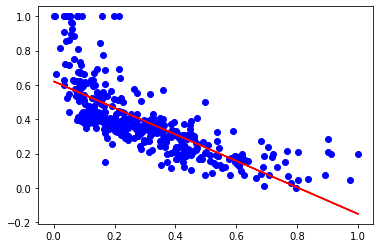

In [0]:
plt.scatter(x_train, y_train, color='b')
plt.plot(x_train, (m * x_train + c) , color = 'r')

Text(0.5, 0, 'Iterations')

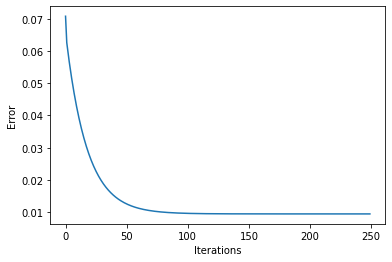

In [0]:
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

In [0]:
predicted = (m * x_test) + c

In [0]:
mean_squared_error(y_test,predicted)

0.0192679281869669

In [0]:
p = pd.DataFrame(list(zip(x_test, y_test,predicted)),columns=['x','target_y','predicted_y' ])
p.head()

,x,target_y,predicted_y
0,[0.4525386313465783],[0.20222222222222225],[0.2713426755593406]
1,[0.0780905077262693],[0.6644444444444444],[0.5604958328538889]
2,[0.17439293598233996],[0.6222222222222222],[0.48612998768380977]
3,[0.0380794701986755],[0.8666666666666667],[0.5913928172368731]
4,[0.3976269315673289],[0.18],[0.31374612309184985]


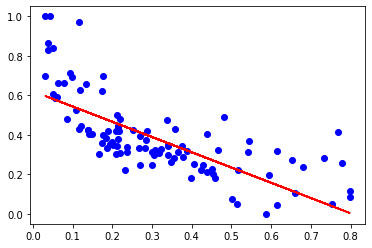

In [0]:
plt.scatter(x_test , y_test, color='b')
plt.plot(x_test, predicted, color='r')

In [0]:
predicted = predicted.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

x_test_scaled = x_scaler.inverse_transform(x_test)
y_test_scaled = y_scaler.inverse_transform(y_test)
predicted_scaled = y_scaler.inverse_transform(predicted)

x_test_scaled = x_test_scaled[:, -1]
y_test_scaled = y_test_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]

p = pd.DataFrame(list(zip(x_test_scaled, y_test_scaled, predicted_scaled)), columns=['x','target_y','predicted_y'])
p = p.round(decimals= 2)
p.head()

,x,target_y,predicted_y
0,18.13,14.1,17.21
1,4.56,34.9,30.22
2,8.05,33.0,26.88
3,3.11,44.0,31.61
4,16.14,13.1,19.12
